# Задание:

- построить столбчатую диаграмму количества покупок по дням
- построить столбчатую диаграмму суммы покупок по дням
- вывести топ-5 стран по сумме покупок через андроид

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,5)

Взглянем на данные в датасетах:

In [2]:
df1 = pd.read_csv('countries[5][1].csv', index_col = 'uid')
df1.head()

,country
uid,
0,Switzerland
1,China
2,Thailand
3,Japan
4,Kazakhstan


In [5]:
df2 = pd.read_csv('purchases[4][1].csv')
df2.head()


,uid,ts,store,re
0,868,2018-11-23 11:00:12.125231,android,2.99
1,35,2018-11-23 12:27:24.238886,android,49.99
2,590,2018-11-16 13:21:11.921000,android,2.99
3,791,2018-11-18 16:24:22.116547,appstore,0.99
4,415,2018-11-26 02:52:18.005350,android,0.99


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
uid      200 non-null int64
ts       200 non-null object
store    200 non-null object
re       200 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.3+ KB


Преобразуем поле 'ts' к типу даты, выведем сгруппированную таблицу количества покупок посуточно:

In [7]:
df2['ts'] = pd.to_datetime(df2['ts'])

a = df2.groupby(pd.Grouper(key='ts', freq="D")).count()

del a['store'], a['re']
a.rename(columns={'uid' : 'count_purchases'}, inplace = True)
a.head()

,count_purchases
ts,
2018-11-01,5
2018-11-02,9
2018-11-03,6
2018-11-04,4
2018-11-05,4


Построим столбчатую диаграмму распределения числа покупок:

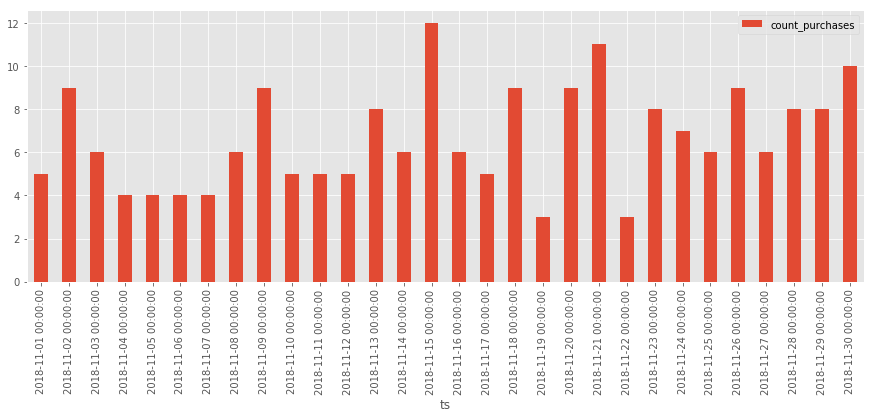

In [8]:
a.plot(kind='bar', figsize=(15,5))

Построим  столбчатую диаграмму суммы покупок по дням:

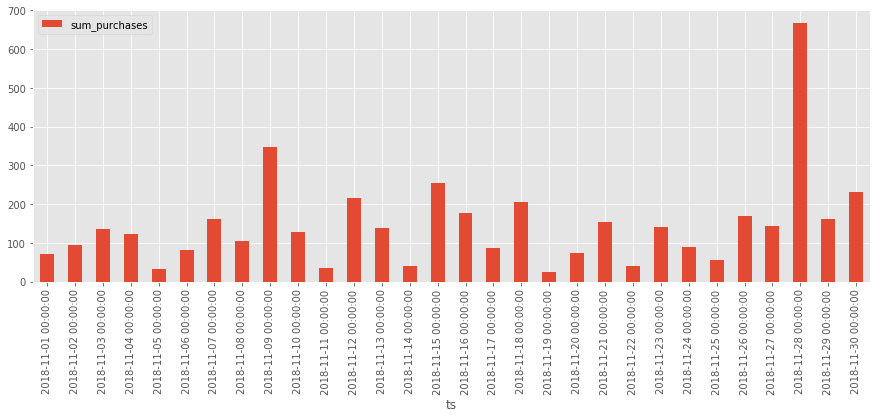

In [9]:
q = df2.groupby(pd.Grouper(key='ts', freq="D")).sum()
del q['uid']
q.rename(columns={'re' : 'sum_purchases'}, inplace = True)
q.plot(kind = 'bar', figsize = (15,5))

Выведем топ-5 стран по сумме покупок через андроид

In [10]:
df_android = (df2.loc[df2['store'] == 'android'])
andr = df_android.merge(df1, on='uid', how = 'left')

del andr['uid'], andr['store'], andr['ts']
s = andr.groupby(['country']).sum()
s.sort_values(['re'], ascending = 0)[:5]

,re
country,
Singapore,441.8593
Switzerland,372.8996
Spain,321.9396
Canada,273.9093
Italy,244.8693
